In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = ["/mnt/data/Anastasia/18_11_29_pd23_11_div6_25Hzsqwave/",
         basef+"18_12_10_pd3_12_div7_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST",
         basef+"18_12_12_pd7_12_div5_WIS_NR-BeRST_DM590",
         basef+"19_01_30_pd25_01_div5_NR_BeRST",
         basef+"19_02_05_pd1_02_div4_NR_BeRST"
]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")
from numpy import *
from matplotlib.pylab import *
from sub.subs import gettimes
%matplotlib inline

In [20]:
len(dfiles)-2

33

In [19]:
times = []
data = []
mint = 1000
maxt = 0
k = 0
for i,cfile in enumerate(dfiles):
    timest = gettimes(cfile)
    timest = timest[timest>0]
    if timest.shape[0]>0:
        k+=1
        mint = min(mint,min(timest))
        maxt = max(maxt,max(timest))
        times.append(timest)
        data.append([i,mean(timest),std(timest)])
        if k==30: print(i,k,cfile)
    print(mint,maxt)

0.00990900000000039 0.010097000000001799
0.00990900000000039 0.010097000000001799
0.00990900000000039 0.010097000000001799
0.00990900000000039 0.010097000000001799
0.009878999999997973 0.01012399999999758
0.009878999999997973 0.01012399999999758
0.009826999999994257 0.010156000000002052
0.009826999999994257 0.010156000000002052
0.009659999999996671 0.010345999999998412
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.010386999999999702
0.009627999999999304 0.01038699999999970

In [22]:
data = array(data)

In [23]:
data.shape

(33, 3)

(array([14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.]),
 array([0.00999937, 0.0099994 , 0.00999943, 0.00999946, 0.00999949,
        0.00999952, 0.00999955, 0.00999959, 0.00999962, 0.00999965,
        0.00999968]),
 <a list of 10 Patch objects>)

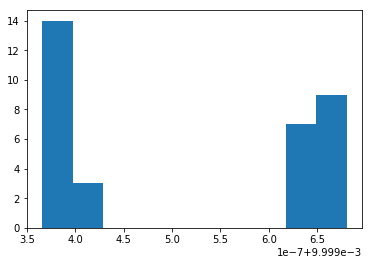

In [6]:
hist(data[:,1])

In [7]:
xbins = linspace(mint-1e-6,maxt+1e-6,101)
for i,tt in enumerate(times):
    h = histogram(tt,xbins)
    hx = h[1]
    hx = (hx[1:]+hx[:-1])*.5
    hey = sqrt(h[0])/sum(h[0])/(hx[1]-hx[0])
    hy = h[0]/sum(h[0])/(hx[1]-hx[0])
    ht = column_stack((hx,hy,hey,hx*0+i))
    if i==0:
        hs = ht
    else:
        hs = row_stack((hs,ht))

0.009999517540802253 2.1946200381899743e-05 0.0021947259247608675


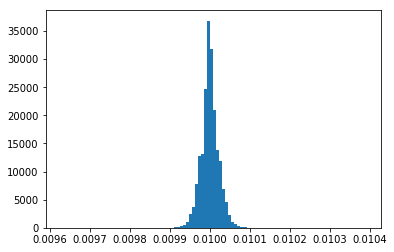

In [8]:
tt = array(times).flatten()
hist(tt,xbins)
print(mean(tt),std(tt),std(tt)/mean(tt))

In [9]:
std(tt)/mean(tt)

0.0021947259247608675

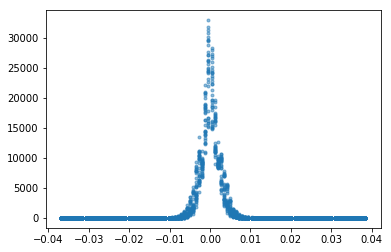

In [10]:
plot((hs[:,0]-.01)/0.01,hs[:,1],'.',alpha=0.5)

In [11]:
0.0021947259*25

0.054868147500000006

In [12]:
from scipy.fftpack import fft

Text(0,0.5,'power(shutter)/max(power)')

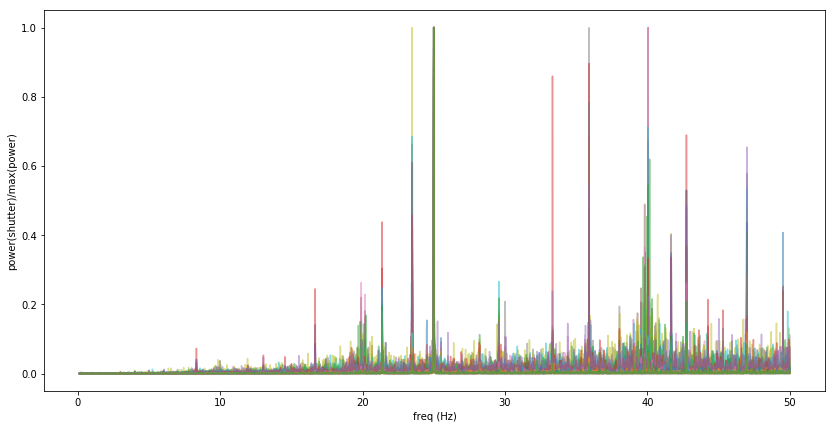

In [13]:
xbins = linspace(mint-1e-6,maxt+1e-6,101)
fs = 100.0
ffs = []
figure(figsize=(14,7))
for i,tt in enumerate(times):
    N = tt.shape[0]-1
    # sample spacing
    T = 1.0/fs
    x = np.linspace(0.0, N*T, N)
    y = tt[1:]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    yyf =  2.0/N * np.abs(yf[:N//2])
    ffs.append([xf,yyf])
    plot(xf[8:],yyf[8:]**2/max(yyf[8:])**2,alpha=0.5)
xlabel("freq (Hz)")
ylabel("power(shutter)/max(power)")


In [14]:
def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.

    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height (if parameter
        `valley` is False) or peaks that are smaller than maximum peak height
         (if parameter `valley` is True).
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.

    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 

    See this IPython Notebook [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)

    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=-1.2, mpd=20, valley=True, show=True)

    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)

    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)

    Version history
    ---------------
    '1.0.5':
        The sign of `mph` is inverted if parameter `valley` is True
    
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
        if mph is not None:
            mph = -mph
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])


    return ind

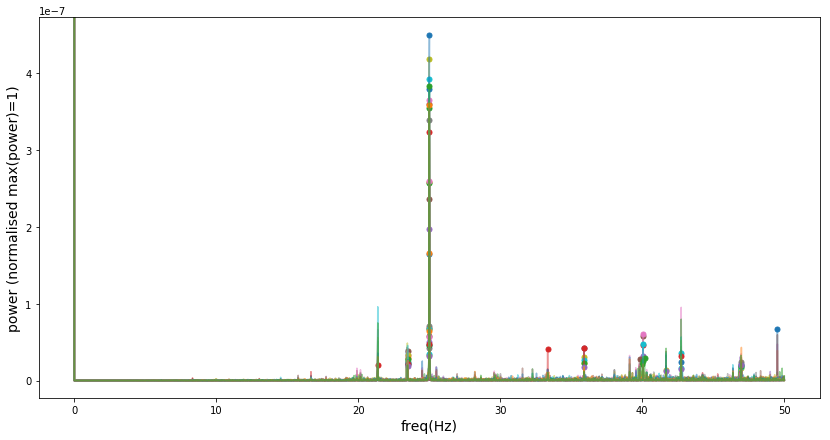

In [15]:
xbins = linspace(mint-1e-6,maxt+1e-6,101)
fs = 100.0
figure(figsize=(14,7))
maxy = 0
for i,ft in enumerate(ffs):
    x,fy = ft
    fy = (fy/max(fy))**2
    fyt = fy[8:]/max(fy[8:])
    indp = detect_peaks(fyt,mph=0.4)
    plot(x,fy,'C'+str(i%10)+'-',alpha=0.5)
    plot(x[8:][indp],fy[8:][indp],'C'+str(i%10)+'.',ms=10)
    maxy = max(maxy,max(fy[8:]))
    ylim(-0.05*maxy,maxy*1.05)
    if max(fy[8:][indp])>0.000012:
        print(i,max(fy[8:][indp]))
xlabel('freq(Hz)',fontsize=14)
ylabel("power (normalised max(power)=1)",fontsize=14)
savefig("FT_shutter.png")

In [16]:
i=30

tt = times[i]
xbins = linspace(mint-1e-6,maxt+1e-6,101)

xbins = linspace(mint-1e-6,maxt+1e-6,101)
fs = 100.0
N = tt.shape[0]-1
T = 1.0/fs
x = np.linspace(0.0, N*T, N)
y = tt[1:]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yyf =  2.0/N * np.abs(yf[:N//2])
ft = yyf**2

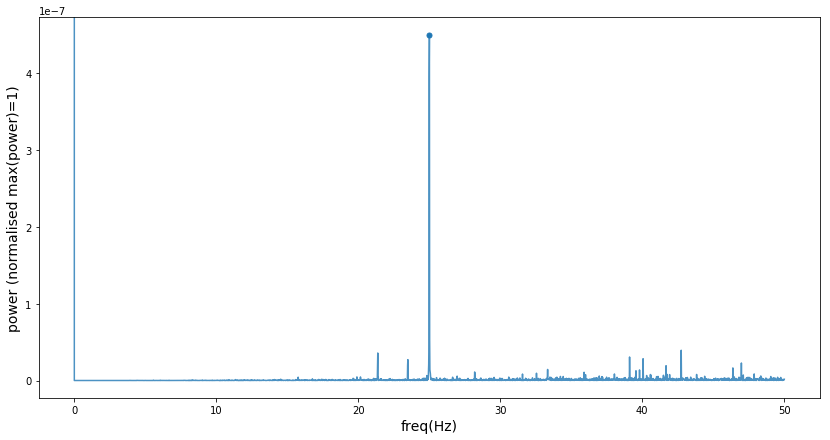

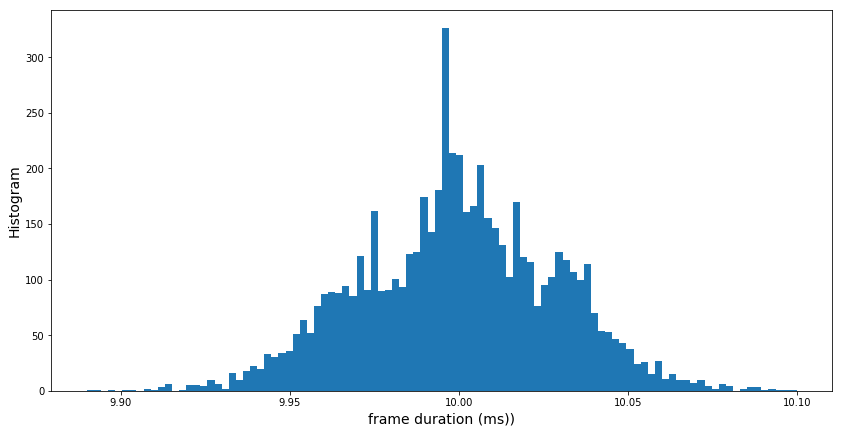

In [17]:


figure(figsize=(14,7))
fy = ft
fy = fy/max(fy)
x = xf
fyt = fy[8:]/max(fy[8:])
indp = detect_peaks(fyt,mph=0.5)
plot(x,fy,'C'+str(i%10)+'-',alpha=0.8)
plot(x[8:][indp],fy[8:][indp],'C'+str(i%10)+'.',ms=10)
ylim(-.05*max(fy[8:]),max(fy[8:])*1.05)
xlabel('freq(Hz)',fontsize=14)
ylabel("power (normalised max(power)=1)",fontsize=14)
savefig("FT_shutterp.png")

figure(figsize=(14,7))
hist(tt*1e3,100)
xlabel('frame duration (ms))',fontsize=14)
ylabel("Histogram",fontsize=14)
savefig("Hist_shutterp.png")


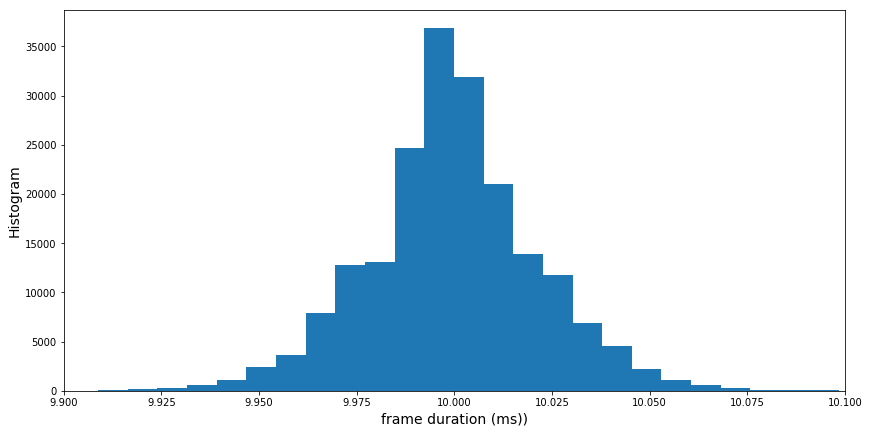

In [61]:
tt2 = []
for tt in times:
    tt2.append(tt.flatten())
tt2 = array(tt2).flatten()

figure(figsize=(14,7))
hist(tt2*1e3,100)
xlabel('frame duration (ms))',fontsize=14)
ylabel("Histogram",fontsize=14)
xlim(9.9,10.1)
savefig("Hist_shutter.png")


In [43]:
std(tt)/mean(tt)

0.0028964183545571614

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.99832443, 0.99849076, 0.99866307, 0.99882342, 0.99899125,
        0.999157  , 0.99932852, 0.99949027, 0.9996582 , 0.99982088,
        1.        , 0.99982088, 0.9996582 , 0.99949027, 0.99932852,
        0.999157  , 0.99899125, 0.99882342, 0.99866307, 0.99849076,
        0.99832443]),
 <matplotlib.lines.Line2D at 0x7fb7345da828>)

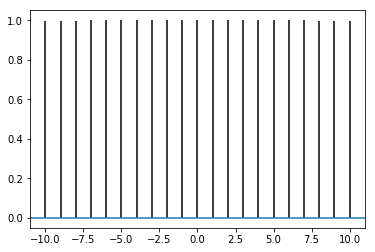

In [68]:
i=30

tt = times[i]
acorr(tt)

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/matplotlib/pyplot.py:2626: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


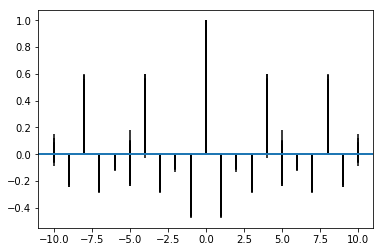

In [90]:
acfs = []
for i in range(len(times)):
    tt = times[i]
    h =acorr(tt-mean(tt),maxlags=10,hold=True)
    sel = h[0]>=0
    acf = h[1][sel]
    acfs.append(acf)
acfs =array(acfs)


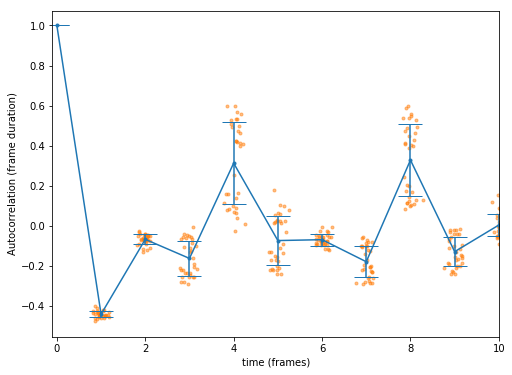

In [122]:
figure(figsize=(8,6))
ax = h[0][sel]
ay =acfs.mean(axis=0)

aey =acfs.std(axis=0)
for i in range(1,11):
    scatter(ax[i]+randn(acfs.shape[0])*.1,acfs[:,i],marker='.',color='C1',alpha=0.5)

plot(ax,ay,'-')
errorbar(ax,ay,aey,capsize=12,fmt='C0.')
xlabel('time (frames)')
ylabel('Autocorrelation (frame duration)')

xlim(-.1,10.0)
savefig("acc_framedur.png")